# Khảo sát phân phối xs của biến động giá CK & Tiền kỹ thuật số 


Điều tôi luôn cảm thấy khó chấp nhận khi tìm hiểu những vấn đề có "tính ngẫu nhiên" đó là giả định phân phối chuẩn (normal distribution) trước khi tác giả bài báo ứng dụng các công thức tính toán tương ứng. Tôi hiểu là nếu giả định này không đúng thì các công thức sau đó là vô nghĩa, ko sử dụng được - thường thì tác giả cũng không đem cho tôi điều gì rõ ràng hơn ngoài việc phải chấp nhận giả định đó. ~^^~

Tôi là fan của chạy giả lập Mote Carlo để dự đoán, phần khảo sát phân phối đối với một biến là quan trọng trước khi chạy giả lập. Cho đến một ngày, tôi nghĩ mình có đủ phương tiện để tự kiểm tra những giả định phân phối chuẩn đó theo một cách trông rất là khoa học. 

<b>Kết luận sau khi khảo sát:</b><br>
1-<br>Hình vẽ ra là chuông úp ngược, kèm theo cái độ tụ tính trên z-score khá là "gần" với phân phối chuẩn (luật 68, 95 và 99.7). Không "mịn" lắm, nhưng nói nó "chuẩn" cũng ko quá sai.

2-<br>Giá đóng cửa giữa 2 ngày giao dịch biến động trong phạm vi 5% cho chứng khoán (Google và Microsoft), và 10% cho tiền kỹ thuật số (Bitcoin và Ethereum)

3-<br>Thời gian khảo sát trên 1 năm thì thấy hình hài phân phối chuẩn, trên 2 năm thì phân phối thấy rõ ràng hơn. Trong khoản thời gian ngắn, biến động ngẫu nhiên khó đoán.

vupa 20210527

In [19]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

def checkStock(stock, start, end='2022'):
    df = pdr.DataReader(stock, start=start, end=end, data_source='yahoo')
    
    # trùng index
    df = df[~df.index.duplicated(keep='first')]
    df = df.asfreq('D', method='pad')
    pct = df['Close'].pct_change()

    # check normal distribution
    mean_df_close = df['Close'].mean()
    std_df_close = df['Close'].std()
    
    # tính z-score
    abs_z_score = df['Close'].sub(mean_df_close).abs().div(std_df_close)
    # bao nhiêu % rơi vào 1z, 2z và 3z
    pcts = [abs_z_score.lt(i).mean() for i in range(1, 4)]

    # rule 68, 95, 99.7
    print("stock {stock} {:.3f} falls within 1z, {:.3f} falls within 2z, and {:.3f} falls within 3z from the mean".format(stock=stock, *pcts))
    print("total rows: {row}".format(row=df.shape[0]))
    
    # vẽ
    sns.distplot(pct, bins=100, color='k')
    plt.title(stock)


1-<br>Hàm này tính độ khác biệt giá đóng cửa ở 2 ngày (percentage change), vẽ ra phân bố histogram để xem có "dấu hiệu" phân bố bình thường (normal distribution) ko một cách trực quan. 

2-<br>Ngoài ra, một phân phối chuẩn sẽ theo luật <b>68-95-99.7</b>, nghĩa là độ tụ xung quanh giá trị trung bình (mean) cho 1, 2 và 3 độ lệch chuẩn (standard deviation). Mặc dù có những test cho normal distribution, toy vẫn thích tính theo cách này vì tính đơn giản dễ giải thích của nó. Tính toán cần qui về phân phối chuẩn (standard normal distribution), đưa về số z-score cho từng phần tử trong tập hợp, rồi tính độ tụ xung quanh giá trị mean dựa trên kq z-score đó.

## Thời gian từ 2020-2021: Google và MSFT

stock GOOG 0.747 falls within 1z, 0.940 falls within 2z, and 1.000 falls within 3z from the mean
total rows: 879


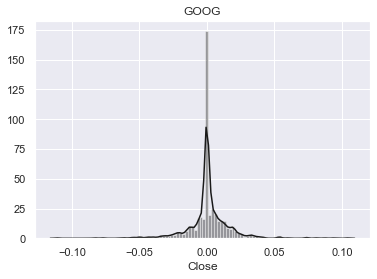

In [20]:
# rule 68, 95, 99.7
checkStock('GOOG', start=2019)

stock MSFT 0.636 falls within 1z, 1.000 falls within 2z, and 1.000 falls within 3z from the mean
total rows: 879


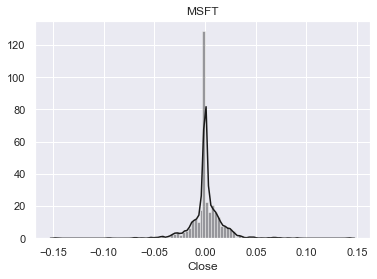

In [21]:
checkStock('MSFT', start=2019)

## Thời gian từ 2020-2021: Bitcoin và Ethereum


stock BTC-USD 0.836 falls within 1z, 0.898 falls within 2z, and 0.997 falls within 3z from the mean
total rows: 879


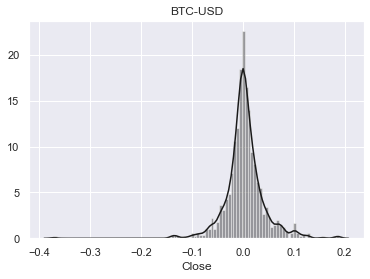

In [22]:
checkStock('BTC-USD', start=2019)

stock ETH-USD 0.857 falls within 1z, 0.936 falls within 2z, and 0.973 falls within 3z from the mean
total rows: 879


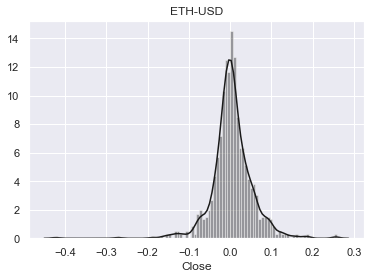

In [23]:
checkStock('ETH-USD', start=2019)